In [43]:
import os 
import sys 
import numpy as np 
import torch 
sys.path[0] = "/home/hojaechoi/work/molkgnn/"
os.chdir(sys.path[0])
from model import GNNModel
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("deargen_qsar.dataset.molkgnn", "../qsar-pytorch/deargen_qsar/dataset/molkgnn.py")
molkgnn = importlib.util.module_from_spec(spec)
sys.modules["deargen_qsar.dataset.molkgnn"] = molkgnn
spec.loader.exec_module(molkgnn)
from deargen_qsar.dataset.molkgnn import QSARDataset


In [46]:
QSARDataset(root = '../qsar-pytorch/Data/preprocessed',
        dataset = 'HTR2B_A_1')

/anaconda/envs/molkgnn/lib/python3.7/site-packages/torch_geometric/data/dataset.py:151: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to sure to delete '../qsar-pytorch/Data/preprocessed/HTR2B_A_1-molkgnn' first
  f"The `pre_transform` argument differs from the one used in "


AttributeError: Can't get attribute 'DataEdgeAttr' on <module 'torch_geometric.data.data' from '/anaconda/envs/molkgnn/lib/python3.7/site-packages/torch_geometric/data/data.py'>

In [29]:
raw_dir = "/home/hojaechoi/work/qsar-pytorch/Data/"
base_dir = "/home/hojaechoi/work/qsar-pytorch/Data/preprocessed/"
data_name_list = ["tox21-tshr-agonist-p1",
                  "tox21-tshr-antagonist-p1",
                  "tox21-tshr-wt-p1",
                  "tox21-trhr-hek293-p1",
                  "pth1r_patent_A",
                  "tlr7_patent_A",
                  "tlr7_patent_B",
                  "GRM5_A_2",
                  "HTR2B_A_1"]

In [6]:


print(f'In Testing Mode:')
print(f'default_root_dir:{args.default_root_dir}')
model_dict = {}
# Load last model
last_path = osp.join(args.default_root_dir, 'last.ckpt')
model  = GNNModel.load_from_checkpoint(last_path, gnn_type=gnn_type, args=args)
model_dict['last'] = model
print('====last_result====:\n')
last_result = trainer.test(model, datamodule=data_module)
os.rename('logs/test_sample_scores.log',
            'logs/last_test_sample_scores.log')

# Save the result to a file
filename = 'logs/test_result.log'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'w') as out_file:
    out_file.write(f'{args.dataset_name}\n')
    out_file.write('last:\n')
    out_file.write(f'{str(last_result)}\n')

    for metric in data_module.dataset["metrics"]:
        best_result, best_model = load_best_model(trainer=trainer, data_module=data_module, metric=metric, args=args)
        model_dict[f'{metric}_best'] = best_model
        if best_result is not False:
            out_file.write(f'best_{metric}:\n')
            out_file.write(f'{str(best_result)}\n')
    out_file.write(f'args:\n')
    out_file.write(f'{args}')
return model_dict

usage: ipykernel_launcher.py [-h] [--logger [LOGGER]]
                             [--checkpoint_callback [CHECKPOINT_CALLBACK]]
                             [--enable_checkpointing [ENABLE_CHECKPOINTING]]
                             [--default_root_dir DEFAULT_ROOT_DIR]
                             [--gradient_clip_val GRADIENT_CLIP_VAL]
                             [--gradient_clip_algorithm GRADIENT_CLIP_ALGORITHM]
                             [--process_position PROCESS_POSITION]
                             [--num_nodes NUM_NODES]
                             [--num_processes NUM_PROCESSES]
                             [--devices DEVICES] [--gpus GPUS]
                             [--auto_select_gpus [AUTO_SELECT_GPUS]]
                             [--tpu_cores TPU_CORES] [--ipus IPUS]
                             [--log_gpu_memory LOG_GPU_MEMORY]
                             [--progress_bar_refresh_rate PROGRESS_BAR_REFRESH_RATE]
                             [--enable_progress_b

SystemExit: 2

Bad pipe message: %s [b',\x90\xa5&\x1ah \x8d\xc5\xad\xe5\xb9\x98= \x88!\xd5\x00\x00\xa2\xc0\x14\xc0\n\x009\x008\x007\x006\x00\x88']
Bad pipe message: %s [b"\xce\xe9oF\xee\xdb]2\xc1\x12\xc9\xdf\xfe\rIgXE\x00\x00\x86\xc00\xc0,\xc0(\xc0$\xc0\x14\xc0\n\x00\xa5\x00\xa3\x00\xa1\x00\x9f\x00k\x00j\x00i\x00h\x009\x008\x007\x006\xc02\xc0.\xc0*\xc0&\xc0\x0f\xc0\x05\x00\x9d\x00=\x005\xc0/\xc0+\xc0'\xc0#\xc0\x13\xc0\t\x00\xa4\x00\xa2\x00\xa0\x00\x9e\x00g\x00@\x00?\x00", b'3\x002\x001\x000\xc01\xc0-\xc0)\xc0%\xc0\x0e\xc0\x04\x00\x9c\x00<\x00/\x00\x9a\x00\x99\x00\x98\x00\x97\x00\x96\x00\x07\xc0\x11\xc0\x07\xc0\x0c\xc0\x02\x00\x05\x00\x04\x00\xff\x02\x01\x00\x00g\x00\x00\x00\x0e\x00']
Bad pipe message: %s [b"\xce\x80\xb2\x8a3\xac\xce\x82\x8c\x9d\x18\x1dG`cf\xc2\xbe\x00\x00\xf4\xc00\xc0,\xc0(\xc0$\xc0\x14\xc0\n\x00\xa5\x00\xa3\x00\xa1\x00\x9f\x00k\x00j\x00i\x00h\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00\xa7\x00m\x00:\x00\x89\xc02\xc0.\xc0*\xc0&\xc0\x0f\xc0\x05\x00\x9d\x00=\x005\x0

In [131]:
import glob
import os.path as osp
from deargen_qsar.model.molkgnn import GNNModel

def load_best_model(trainer, data_module, metric=None, args=None):
    # Load best model
    search_name = f'best*_{metric}*'
    all_files = glob.glob(osp.join(args.default_root_dir, search_name))
    if len(all_files) == 1:
        best_path = all_files[0]
    elif len(all_files) >1:
        print(f"entry::more than one best model found for {metric}!!!")
        return False
    elif len(all_files) ==0:
        print(f'No best model saved for {metric}')
        return False
    print(f"glob result:{best_path}")

    model  = GNNModel.load_from_checkpoint(best_path, gnn_type=gnn_type, args=args)
    print(f'====best_{metric}_result====:\n')
    best_result = trainer.test(model, datamodule=data_module)
    new_name = f'logs/best_{metric}_sample_scores.log'
    os.rename('logs/test_sample_scores.log', new_name)
    return best_result

In [132]:
config_file = "config/config_dti/config.yaml"
config = Config.parse_config(config_file)
config.state_dict = 'model_weight/fold0_best_model.ckpt'
embedder = DearDTIEmbedder()
embedder.load_embedder(model=config.model, state_dict=config.state_dict, device=config.device)

load data from data/GRM5_A_2_test.csv
load data from data/GRM5_A_2_train.csv


In [85]:
dti_model = embedder.drug_model

batch_norm = True
        
GNNlayers = torch.nn.ModuleList([ GNNLayer({'conv': getattr(dti_model, f'conv{i}'), 
            'bn': getattr(dti_model, f'g{i}_bn'),
            'relu': getattr(dti_model, 'relu')}) for i in range(1, 4)])
pool_layer = PoolLayer()
FClayers = torch.nn.ModuleList([ FCLayer({'fc': getattr(dti_model, f'fc_g{i}'), 
            'bn': getattr(dti_model, f'fc_g{i}_bn'),
            'relu': getattr(dti_model, 'relu')}, 
            batch_norm = batch_norm) for i in range(1, 3)])
    
new_dti_model = EmbbedLayerDict({'gnn_layers' : Sequential(*GNNlayers),
                        'fc_layers' : Sequential(*FClayers)})

In [74]:
new_dti_model.keys()

odict_keys(['gnn_layers', 'fc_layers'])

In [80]:
for name, module in  embedder.emb_model.named_modules():
    print(name, module)
    # if isinstance(module, ReLU):
    #     print('relu')
    #     module = Identity()
# embedder.emb_model[0]
# .get_submodule('module_3')

 EmbbedLayerSequence(
  (0): GNNLayer(
    (conv): GATv2Conv(78, 78, heads=1)
    (bn): GraphNorm(78)
    (relu): ReLU()
  )
  (1): GNNLayer(
    (conv): GATv2Conv(78, 156, heads=1)
    (bn): GraphNorm(156)
    (relu): ReLU()
  )
  (2): GNNLayer(
    (conv): GATv2Conv(156, 312, heads=1)
    (bn): GraphNorm(312)
    (relu): ReLU()
  )
  (3): PoolLayer()
  (4): FCLayer(
    (fc): Linear(in_features=312, out_features=1024, bias=True)
    (bn): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (5): FCLayer(
    (fc): Linear(in_features=1024, out_features=128, bias=True)
    (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
)
0 GNNLayer(
  (conv): GATv2Conv(78, 78, heads=1)
  (bn): GraphNorm(78)
  (relu): ReLU()
)
0.conv GATv2Conv(78, 78, heads=1)
0.conv.aggr_module SumAggregation()
0.conv.lin_l Linear(78, 78, bias=True)
0.conv.lin_r Linear(78, 78, bias=True)
0.bn GraphNorm(7

In [16]:
import torch
import torch.nn as nn
import torch_geometric.nn as gnn
from torch_geometric.nn import GCNConv, global_max_pool as gmp
from typing import Any

# WARNING: It is not clearly same with deargen_dti.model.dive.gcn.
#          Therefore, if you want to reproduce *dive2dti*, please use
#          the original `GCNNet3` module instead.


class GATTNet(torch.nn.Module):
    def __init__(self,
                 in_channels:int,
                 base_filters:int,
                 out_channels:int,
                 dropout:float=0.1,
                 batch_norm:bool=False):
        super(GATTNet, self).__init__()
        self.batch_norm = batch_norm
        self.in_channels = in_channels

        self.conv1 = gnn.GATv2Conv(in_channels, base_filters)
        self.conv2 = gnn.GATv2Conv(base_filters, base_filters*2)
        self.conv3 = gnn.GATv2Conv(base_filters*2, base_filters*4)

        self.g1_bn = gnn.GraphNorm(base_filters)
        self.g2_bn = gnn.GraphNorm(base_filters*2)
        self.g3_bn = gnn.GraphNorm(base_filters*4)      

        self.fc_g1 = torch.nn.Linear(base_filters*4, 1024)
        self.fc_g2 = torch.nn.Linear(1024, out_channels)
        if self.batch_norm:
            self.fc_g1_bn = nn.BatchNorm1d(1024)
            self.fc_g2_bn = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, graph)->torch.Tensor:
        x, edge_index, batch = graph.x, graph.edge_index, graph.batch

        x = self.conv1(x, edge_index)
        x = self.g1_bn(x, batch)
        x = self.relu(x)

        x = self.conv2(x, edge_index)
        x = self.g2_bn(x, batch)
        x = self.relu(x)

        x = self.conv3(x, edge_index)
        x = self.g3_bn(x, batch)
        x = self.relu(x)
        x = gmp(x, batch)  # global max pooling

        x = self.fc_g1(x)
        if self.batch_norm:
            # There is an error here when I use batch_norm
            x = self.fc_g1_bn(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc_g2(x)
        if self.batch_norm:
            x = self.fc_g2_bn(x)

        return x


In [117]:
device = next(embedder.emb_model.parameters()).device

tgdata = transform_drug('CC1(C)CC(=O)N(c2ccc(C#Cc3ccccc3)cn2)C1').to(device)

0 0 <class '__main__.GNNLayer'>
0 1 <class '__main__.GNNLayer'>
1 1 <class '__main__.GNNLayer'>
0 2 <class '__main__.GNNLayer'>
1 2 <class '__main__.GNNLayer'>
2 2 <class '__main__.GNNLayer'>
0 3 <class '__main__.GNNLayer'>
1 3 <class '__main__.GNNLayer'>
2 3 <class '__main__.GNNLayer'>
3 3 <class '__main__.PoolLayer'>
4 4 <class '__main__.FCLayer'>
0 4 <class '__main__.GNNLayer'>
1 4 <class '__main__.GNNLayer'>
2 4 <class '__main__.GNNLayer'>
3 4 <class '__main__.PoolLayer'>
4 5 <class '__main__.FCLayer'>
5 5 <class '__main__.FCLayer'>


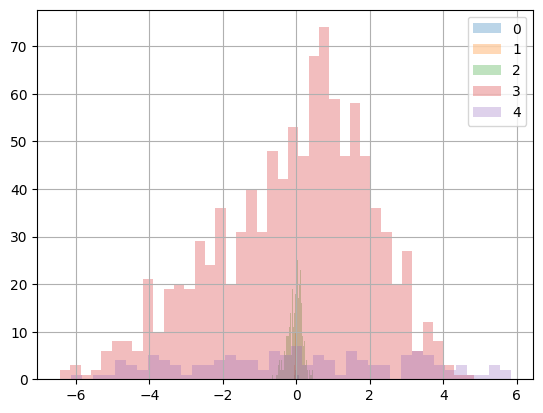

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
for lv in range(5):
    embedder.emb_model.eval()
    with torch.no_grad():
        new_tgdata = embedder.emb_model(tgdata, level = lv)
    pd.Series(new_tgdata.cpu().numpy().ravel()).hist(bins = 40, alpha = 0.3, label = lv)
plt.legend();plt.show()

0 0 <class '__main__.GNNLayer'>
0 1 <class '__main__.GNNLayer'>
1 1 <class '__main__.GNNLayer'>
0 2 <class '__main__.GNNLayer'>
1 2 <class '__main__.GNNLayer'>
2 2 <class '__main__.GNNLayer'>
0 3 <class '__main__.GNNLayer'>
1 3 <class '__main__.GNNLayer'>
2 3 <class '__main__.GNNLayer'>
3 3 <class '__main__.PoolLayer'>
4 4 <class '__main__.FCLayer'>
0 4 <class '__main__.GNNLayer'>
1 4 <class '__main__.GNNLayer'>
2 4 <class '__main__.GNNLayer'>
3 4 <class '__main__.PoolLayer'>
4 5 <class '__main__.FCLayer'>
5 5 <class '__main__.FCLayer'>


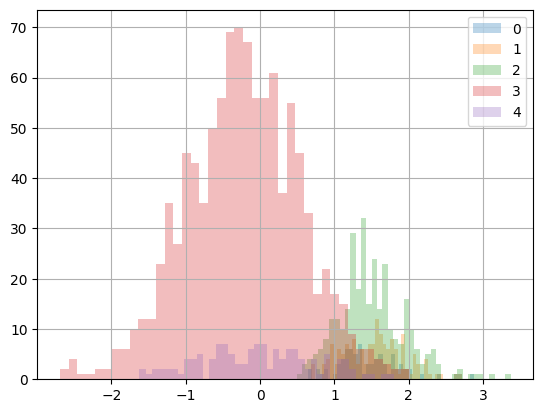

In [123]:
import pandas as pd
for lv in range(5):
    embedder.emb_model.eval()
    with torch.no_grad():
        new_tgdata = embedder.emb_model(tgdata, level = lv, reduce = 'max')
    pd.Series(new_tgdata.cpu().numpy().ravel()).hist(bins = 40, alpha = 0.3, label = lv)
plt.legend();plt.show()

In [14]:
from torch_geometric.data import Data
from torch_geometric.nn import (Sequential, 
                                global_max_pool, global_mean_pool)



class Seperator(torch.nn.Module):
    def forward(self, graph):
        return graph.x, graph.edge_index, graph.batch

class Aggregator(torch.nn.Module):
    def forward(self, **kwargs):
        graph = Data(**kwargs)
        return graph

class EmbbedLayerSequence(torch.nn.Sequential):
    def forward(self, input, level = -1, reduce = 'mean'):
        for i, module in enumerate(self):
            if i < level or level < 0:
                input = module(input)
            else:
                break
        
        if reduce == 'mean':
            return global_mean_pool(input.x, input.batch)
        elif reduce == 'max':
            return global_max_pool(input.x, input.batch)
        else:
            return input
        
layers = [ (tgSequential('graph', [
                            (Seperator(), 'graph -> x, edge_index, batch'),
                            (getattr(embedder.emb_model, f'conv{i}'), 'x, edge_index -> x'),
                            (getattr(embedder.emb_model, f'g{i}_bn'), 'x, batch -> x'),
                            (getattr(embedder.emb_model, 'relu'), 'x -> x'),
                            (Aggregator(), 'x=x, edge_index=edge_index, batch=batch -> graph')
                            ]), 'graph -> graph') for i in range(1,4)]
                            

GATnet1 = Sequential('graph', layers)

EmbbedLayerSequence(*layers)

layers = torch.nn.ModuleList([
EmbbedLayer({'conv': embedder.emb_model.conv1, 
                    'bn': embedder.emb_model.g1_bn,
                    'relu': embedder.emb_model.relu}),
EmbbedLayer({'conv': embedder.emb_model.conv2, 
                    'bn': embedder.emb_model.g2_bn,
                    'relu': embedder.emb_model.relu}),
EmbbedLayer({'conv': embedder.emb_model.conv3, 
                    'bn': embedder.emb_model.g3_bn,
                    'relu': embedder.emb_model.relu})
])


GATnet2 = EmbbedLayerSequence(*layers)


In [22]:
EmbbedLayerSequence(*list(GATnet1))(tgdata, level=2)

tensor([[0.3249, 0.3056, 0.3222, 0.3238, 0.3430, 0.3560, 0.3403, 0.3498, 0.3400,
         0.2771, 0.3275, 0.3535, 0.3759, 0.3972, 0.2766, 0.3353, 0.3327, 0.3356,
         0.2643, 0.2861, 0.2960, 0.2914, 0.3507, 0.2951, 0.3466, 0.3523, 0.3468,
         0.3427, 0.3268, 0.3430, 0.3297, 0.3377, 0.2942, 0.3484, 0.3275, 0.3289,
         0.3149, 0.2614, 0.2836, 0.3371, 0.3130, 0.3579, 0.2912, 0.3134, 0.3151,
         0.3505, 0.3645, 0.2960, 0.3571, 0.3599, 0.3526, 0.3116, 0.3017, 0.3429,
         0.3355, 0.2950, 0.3031, 0.3314, 0.2949, 0.3618, 0.3417, 0.2779, 0.3611,
         0.3496, 0.3163, 0.3158, 0.2916, 0.3394, 0.3526, 0.3499, 0.3556, 0.3808,
         0.3516, 0.3336, 0.2849, 0.3686, 0.3415, 0.3485, 0.3715, 0.2866, 0.3131,
         0.3397, 0.3035, 0.3295, 0.3479, 0.3128, 0.3732, 0.3708, 0.3563, 0.3288,
         0.3295, 0.3460, 0.3207, 0.3692, 0.2876, 0.3478, 0.2738, 0.3349, 0.3716,
         0.2981, 0.2935, 0.2911, 0.3653, 0.3056, 0.2943, 0.3285, 0.3627, 0.3294,
         0.2785, 0.3553, 0.3

In [16]:
with torch.no_grad():
    new_tgdata = GATnet1(tgdata)


In [22]:

with torch.no_grad():
    new_tgdata = GATnet((tgdata.x,tgdata.edge_index,tgdata.batch) , level = 3)


TypeError: forward() missing 2 required positional arguments: 'edge_index' and 'batch'

In [15]:
new_tgdata.shape

torch.Size([1, 312])

In [17]:
layer1 = Sequential('x, edge_index, batch', [
    (embedder.emb_model.conv1, 'x, edge_index -> x'),
    (embedder.emb_model.g1_bn, 'x, batch -> x'),
    (embedder.emb_model.relu, 'x -> x')
])
layer1

Sequential(
  (0): GATv2Conv(78, 78, heads=1)
  (1): GraphNorm(78)
  (2): ReLU()
)

In [10]:
embedder.get_features(smiles=preprocessor.df.SMILES[0])

NameError: name 'preprocessor' is not defined

In [11]:
preprocessor.df.SMILES[0]

NameError: name 'preprocessor' is not defined

In [18]:

from deargen_qsar.dataset import MolGraphData
trainset = MolGraphData(
      data_path="Data_common/train_test_csv/grm5_train.csv",
      protein_name='grm5',
      target_key="fasta",
      drug_key="smiles",
      label_key='pAC50')


load data from Data_common/train_test_csv/grm5_train.csv


In [34]:
from deargen_qsar.dataset.dataloader import Collater
collate = Collater(follow_batch=[], exclude_keys=[])

collated_data = collate(trainset)
tgdata = collated_data[0].to(config.device)

In [54]:
mf_deardti_ndarray = embedder.embed(tgdata)

In [55]:
mf_deardti_ndarray.shape #tolist()

(197, 128)

In [57]:
mf_deardti = [vec for vec in mf_deardti_ndarray]

In [ ]:
trainset.df.itertuples()

In [134]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import numpy as np
from rdkit.Avalon import pyAvalonTools
from deargen_qsar.dataset.utils.scaling import convert_into_p, convert_into_nM, normalize
import torch
import os
from deargen_qsar.utils.scaling import FixedPointScaler
from deargen_qsar.dataset.mf_features.rdkit_mf import RdkitMfFeature
# deardtidb
from deargen_qsar.dataset.deardtidb import (load_deardti_data,
                                            load_protein,
                                            AVAILABLE_DATA,
                                            AVAILABLE_PROTEIN)
from deargen_qsar.dataset.tox21 import (load_tox21_data,
                                        load_protein,
                                        AVAILABLE_DATA,
                                        AVAILABLE_PROTEIN)
from deargen_qsar.dataset.tox21 import (load_tox21_data,
                                        load_protein,
                                        AVAILABLE_DATA,
                                        AVAILABLE_PROTEIN)
from tqdm import tqdm

class MfFeaturePreprocessor:
    def __init__(self,
                 data_name,
                 protein_name,
                 base_dir: str = "Data",
                 save_dir: str = None):
        self.data_name = data_name
        self.protein_name = protein_name
        self.save_dir = save_dir
        
        if self.save_dir is None:
            self.save_dir = os.path.join(base_dir,
                                         "preprocessed",
                                         f"{data_name}-baseline")
            os.makedirs(self.save_dir, exist_ok=True)


        # Load df
        if protein_name in AVAILABLE_PROTEIN:
            self.label_key = label_key = "A"
            self.which_dataset = "dtidb"
            self.protein = load_protein(name=self.protein_name, base_dir=base_dir)
            df = load_deardti_data(name=self.data_name,
                                   base_dir=base_dir,
                                   label_key=label_key)

        elif protein_name in AVAILABLE_PROTEIN:
            self.label_key = label_key = "AC50"
            self.which_dataset = "tox21"
            self.protein = load_protein(name=self.protein_name, base_dir=base_dir)
            df = load_tox21_data(name=self.data_name,
                                 base_dir=base_dir)
        else:
            raise ValueError(f"Inappropriate Protein name {protein_name}")

        error_file_path = os.path.join(base_dir, f"preprocessed/error/{data_name}.txt")
        if os.path.isfile(error_file_path):
            with open(os.path.join(base_dir, f"preprocessed/error/{data_name}.txt"), "r") as f:
                error_list = f.readlines()
        else:
            error_list = []

        error_list = [int(i.replace("\n", "")) for i in error_list]
        error_free_list = list(set(range(len(df))).difference(error_list))
        self.df = df.iloc[error_free_list].reset_index(drop=True)

        sorted_idx = np.argsort(self.df[label_key].tolist())[::-1]
        self.rank_dict = {index: rank for rank, index in enumerate(sorted_idx)}
        if protein_name in AVAILABLE_PROTEIN:
            self.df["pAC50"] = self.df[label_key]
        else:
            self.df["pAC50"] = convert_into_p(self.df[label_key])

        scaler = FixedPointScaler(bias=5, scale=5)

        self.df = self.df.query('pAC50 > 3').reset_index(drop=True)
        self.df["pAC50"] = scaler.transform(self.df["pAC50"])
        self.mf_feature = embedder.get_features

    def preprocess(self, level=None, reduce='max'):
        preprocessed_df = dict()
        tbar = tqdm(range(len(self.df)))
        for index in tbar:
            tmp = self.df.iloc[index]
            rank = self.rank_dict[index]

            if "pAC50" not in preprocessed_df:
                preprocessed_df["pAC50"] = []
            preprocessed_df["pAC50"].append(tmp["pAC50"])

            if "RANK" not in preprocessed_df:
                preprocessed_df["RANK"] = []
            preprocessed_df["RANK"].append(rank)

            if "FASTA" not in preprocessed_df:
                preprocessed_df["FASTA"] = []
            preprocessed_df["FASTA"].append(self.protein)

            if self.which_dataset == "dtidb":
                if "AC50" not in preprocessed_df:
                    preprocessed_df["AC50"] = []
                preprocessed_df["AC50"].append(convert_into_nM(tmp["A"]))
                smiles = tmp["smiles_string"]
            else:
                if "AC50" not in preprocessed_df:
                    preprocessed_df["AC50"] = []
                preprocessed_df["AC50"].append(tmp["AC50"])
                smiles = tmp["SMILES"]

            preprocessed_feature = self.mf_feature(smiles, level=level, reduce=reduce )
            
            if "MF_FEATURE" not in preprocessed_df:
                preprocessed_df["MF_FEATURE"] = []
            preprocessed_df["MF_FEATURE"].append(preprocessed_feature)

            if "SMILES" not in preprocessed_df:
                preprocessed_df["SMILES"] = []
            preprocessed_df["SMILES"].append(smiles)

        preprocessed_df["MF_FEATURE"] = np.array(preprocessed_df["MF_FEATURE"])
        # Save as h5py file
        
        h5py_file_path = os.path.join(self.save_dir, f"mf_feature_dti{reduce}l{level}.h5")
        torch.save(preprocessed_df, h5py_file_path)

/anaconda/envs/qsar_pytorch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


load data from data/GRM5_A_2_test.csv
load data from data/GRM5_A_2_train.csv
Data(x=[22, 78], edge_index=[2, 48], smiles='CC1(C)CC(=O)N(c2ccc(C#Cc3ccccc3)cn2)C1')


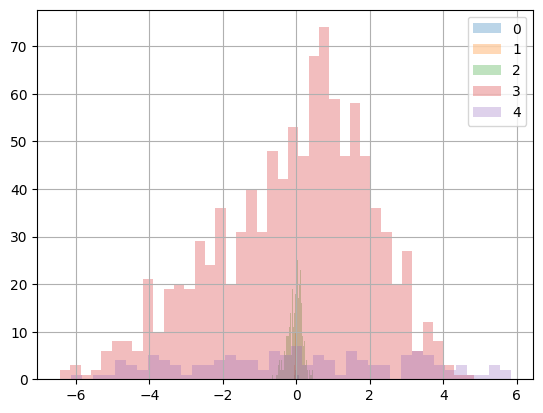

In [1]:
from deargen_qsar.dataset.mf_features.deardti_enc import main
main()

In [135]:

from deargen_qsar.dataset.utils.scaling import convert_into_p, normalize
from itertools import product
data_protein_names = [
    ('GRM5_A_2', 'GRM5'.lower()), 
    ('HTR2B_A_1', 'HTR2B'.lower()),
    ('tox21-trhr-hek293-p1', 'trhr'),
    ('tox21-tshr-agonist-p1', 'tshr'),
    ('tox21-tshr-antagonist-p1', 'tshr'),
    ('tox21-tshr-wt-p1', 'tshr'),
    ('pth1r_patent_A', 'pth1r')]
base_dir = '/home/hojaechoi/work/qsar-pytorch/Data'
for data_name, protein_name in data_protein_names:
    for level, reduce in product(range(5), ('max', 'mean')):
        preprocessor = MfFeaturePreprocessor(
                    data_name=data_name,
                    protein_name=protein_name,
                    base_dir=base_dir)
        preprocessor.preprocess(level=level, reduce=reduce)

100%|██████████| 518/518 [00:02<00:00, 205.51it/s]


ValueError: Inappropriate Protein name pth1r

In [13]:
data_name = 'GRM5_A_2'
protein_name = 'GRM5'.lower()
base_dir = 'Data'
preprocessor = MfFeaturePreprocessor(
                 data_name=data_name,
                 protein_name=protein_name,
                 base_dir=base_dir)

In [24]:
import torch
mf_feature = torch.load('/home/hojaechoi/work/qsar-pytorch/Data/preprocessed/GRM5_A_2-baseline/mf_feature_dti.h5')
mf_feature2= torch.load('/home/hojaechoi/work/qsar-pytorch/Data/preprocessed/GRM5_A_2-baseline/mf_feature_base.h5')
# mf_feature2 = torch.load('/home/hojaechoi/work/qsar-pytorch/Data/preprocessed/tox21-tshr-agonist-p1-baseline/mf_feature_dti.h5')
print(mf_feature.keys())
print(mf_feature['AC50'])
print(mf_feature['pAC50'])


dict_keys(['pAC50', 'RANK', 'FASTA', 'AC50', 'MF_FEATURE', 'SMILES'])
[7.443697499232712, 7.585026652029182, 7.4089353929735005, 7.823908740944319, 7.431798275933005, 7.236572006437063, 6.886056647693163, 7.481486060122112, 7.886056647693163, 7.67778070526608, 7.055517327849831, 8.154901959985743, 7.481486060122112, 7.823908740944319, 7.096910013008056, 8.045757490560675, 7.455931955649724, 7.602059991327962, 7.853871964321762, 7.244125144327507, 7.602059991327962, 6.576754126063192, 7.229147988357855, 7.455931955649724, 7.221848749616356, 7.236572006437063, 7.795880017344075, 7.920818753952375, 7.920818753952375, 7.387216143280264, 7.161150909262744, 7.376750709602099, 7.721246399047171, 7.161150909262744, 7.236572006437063, 6.008330992620051, 7.455931955649724, 6.886056647693163, 6.411168274405792, 7.823908740944319, 8.0, 7.568636235841012, 7.537602002101044, 6.482804102050025, 7.853871964321762, 6.166852888087215, 7.619788758288394, 7.958607314841775, 7.229147988357855, 7.8538719643

<Axes: ylabel='Count'>

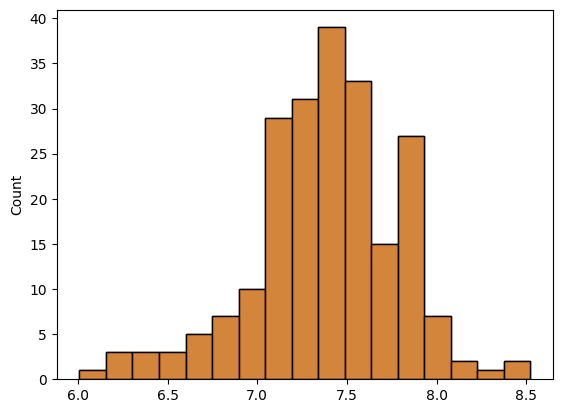

In [25]:
import seaborn as sns
sns.histplot(x = mf_feature['AC50'])
sns.histplot(x = mf_feature2['AC50'])

<Axes: ylabel='Count'>

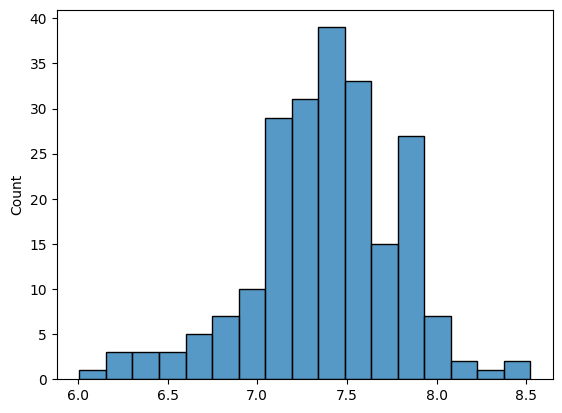

In [27]:
import seaborn as sns
import numpy as np
sns.histplot(x = np.array(mf_feature['pAC50'])*5+5)
sns.histplot(x = np.array(mf_feature2['pAC50'])*5+5)

<Axes: ylabel='Count'>

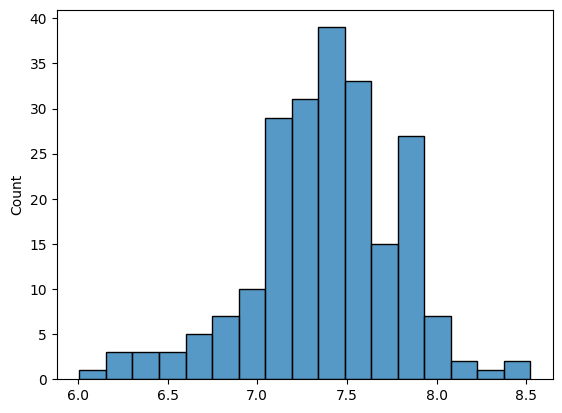

In [28]:
sns.histplot(x = np.array(mf_feature2['pAC50'])*5+5)

In [15]:
preprocessor.df

,idx,smiles,fasta,B,I,A,B_5,I_5,A_5,B_6,...,A_6,smiles_string,fasta_sequence,compound_id,mol_weight,protein_name,gene_name,protein_id,category,pAC50
0,45650,722858,159,NaN,NaN,7.443697,NaN,NaN,1.0,NaN,...,1.0,CC1(C)CN(c2ccc(C#Cc3ccccc3)cn2)C1=O,MVLLLILSVLLLKEDVRGSAQSSERRVVAHMPGDIIIGALFSVHHQ...,222807,276.339,METABOTROPIC GLUTAMATE RECEPTOR 5,GRM5,P41594,G-protein coupled receptor,0.488739
1,45585,722813,159,NaN,NaN,7.585027,NaN,NaN,1.0,NaN,...,1.0,O=C1[C@H]2CCC[C@H]2N1c1ccc(C#Cc2ccccc2)cn1,MVLLLILSVLLLKEDVRGSAQSSERRVVAHMPGDIIIGALFSVHHQ...,222758,288.350,METABOTROPIC GLUTAMATE RECEPTOR 5,GRM5,P41594,G-protein coupled receptor,0.517005
2,45536,722859,159,NaN,NaN,7.408935,NaN,NaN,1.0,NaN,...,1.0,O=C1[C@H]2CCC[C@H]2N1c1ccc(C#Cc2cccnc2)cn1,MVLLLILSVLLLKEDVRGSAQSSERRVVAHMPGDIIIGALFSVHHQ...,222808,289.338,METABOTROPIC GLUTAMATE RECEPTOR 5,GRM5,P41594,G-protein coupled receptor,0.481787
3,45689,722778,159,NaN,NaN,7.823909,NaN,NaN,1.0,NaN,...,1.0,O=C1OC2(CC2)CN1c1ccc(C#Cc2ccccc2)cn1,MVLLLILSVLLLKEDVRGSAQSSERRVVAHMPGDIIIGALFSVHHQ...,222722,290.322,METABOTROPIC GLUTAMATE RECEPTOR 5,GRM5,P41594,G-protein coupled receptor,0.564782
4,45568,722782,159,NaN,NaN,7.431798,NaN,NaN,1.0,NaN,...,1.0,CC1(C)CC(=O)N(c2ccc(C#Cc3ccccc3)cn2)C1,MVLLLILSVLLLKEDVRGSAQSSERRVVAHMPGDIIIGALFSVHHQ...,222726,290.366,METABOTROPIC GLUTAMATE RECEPTOR 5,GRM5,P41594,G-protein coupled receptor,0.486360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,45643,722896,159,NaN,NaN,7.244125,NaN,NaN,1.0,NaN,...,1.0,CN1C(=O)N(c2ncc(C#Cc3cc(F)ccc3F)cn2)CCC1(C)C,MVLLLILSVLLLKEDVRGSAQSSERRVVAHMPGDIIIGALFSVHHQ...,222853,356.376,METABOTROPIC GLUTAMATE RECEPTOR 5,GRM5,P41594,G-protein coupled receptor,0.448825
214,45577,722903,159,NaN,NaN,7.161151,NaN,NaN,1.0,NaN,...,1.0,CC1CN(c2ncc(C#Cc3cc(F)ccc3F)cn2)C(=O)OC1(C)C,MVLLLILSVLLLKEDVRGSAQSSERRVVAHMPGDIIIGALFSVHHQ...,222860,357.360,METABOTROPIC GLUTAMATE RECEPTOR 5,GRM5,P41594,G-protein coupled receptor,0.432230
215,45701,722891,159,NaN,NaN,7.244125,NaN,NaN,1.0,NaN,...,1.0,CO[C@H]1C(=O)N(c2ncc(C#Cc3cc(F)ccc3F)cn2)CC1(C)C,MVLLLILSVLLLKEDVRGSAQSSERRVVAHMPGDIIIGALFSVHHQ...,222846,357.360,METABOTROPIC GLUTAMATE RECEPTOR 5,GRM5,P41594,G-protein coupled receptor,0.448825
216,45645,722861,159,NaN,NaN,7.408935,NaN,NaN,1.0,NaN,...,1.0,CC(C)N1C(=O)N(c2ccc(C#Cc3ccccc3)cn2)C2CCCCC21,MVLLLILSVLLLKEDVRGSAQSSERRVVAHMPGDIIIGALFSVHHQ...,222811,359.473,METABOTROPIC GLUTAMATE RECEPTOR 5,GRM5,P41594,G-protein coupled receptor,0.481787


In [47]:
dti_feat = torch.load('/home/hojaechoi/work/qsar-pytorch/Data_common/preprocessed/GRM5_A_2-baseline/mf_feature_dti.h5')['MF_FEATURE']
mf_feat = torch.load('/home/hojaechoi/work/qsar-pytorch/Data_common/preprocessed/GRM5_A_2-baseline/mf_feature_plusmhfp.h5')['MF_FEATURE']

In [48]:
print(dti_feat.shape)
print(mf_feat.shape)

(218, 128)
(218, 18933)
